# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [ ]:
#  student details 1: Daniela S. 9461
#  student details 2: Anat K. 1126

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: Chat-GPT
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
In the dataset we have for each patient 10 attributes: age, sex, BMI, average blood pressure, total cholesterol, LDL, HDL, TCH, LTG and glucose levels.
our task is to predict a numerical value that represents the progression of the disease after one year. In other words, how much the diabetes has  worsened or changed according to the attributes.

</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("diabetes_train.csv")
test_df = pd.read_csv("diabetes_test.csv")

In [3]:
print("Train set - first 5 rows:")
display(train_df.head())
print("Test set - first 5 rows:")
display(test_df.head())

Train set - first 5 rows:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,52.0,1.0,23.0,107.00,179.0,123.7,42.5,4.21,4.1589,93.0,50.0
1,22.0,1.0,18.6,97.00,114.0,57.6,46.0,2.00,3.9512,83.0,101.0
2,34.0,2.0,25.3,111.00,230.0,162.0,39.0,6.00,4.9767,90.0,181.0
3,38.0,2.0,26.8,105.00,181.0,119.2,37.0,5.00,4.8203,91.0,107.0
4,55.0,1.0,23.0,94.67,190.0,137.6,38.0,5.00,4.2767,106.0,146.0


Test set - first 5 rows:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,60.0,2.0,28.2,112.0,185.0,113.8,42.0,4.0,4.9836,93.0,178.0
1,55.0,2.0,22.9,81.0,123.0,67.2,41.0,3.0,4.3041,88.0,129.0
2,46.0,1.0,20.6,73.0,172.0,107.0,51.0,3.0,4.2485,80.0,53.0
3,58.0,1.0,22.8,91.0,196.0,118.8,48.0,4.0,4.9836,115.0,206.0
4,36.0,2.0,24.1,112.0,193.0,125.0,35.0,6.0,5.1059,95.0,163.0


In [4]:
print("Statistics for each variable:")
display(train_df.describe())

Statistics for each variable:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,48.433428,1.461756,26.365439,94.599518,189.977337,115.864306,50.228045,4.052635,4.636994,91.396601,152.243626
std,13.362376,0.499243,4.517617,14.118033,34.745332,30.427219,13.185724,1.292732,0.526080,11.340604,78.169016
min,19.000000,1.000000,18.000000,62.000000,110.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.000000,1.000000,23.100000,84.000000,165.000000,96.000000,40.000000,3.000000,4.276700,83.000000,85.000000
50%,50.000000,1.000000,25.700000,93.000000,187.000000,113.400000,49.000000,4.000000,4.595100,91.000000,140.000000
75%,59.000000,2.000000,29.200000,105.000000,213.000000,135.600000,58.000000,5.000000,4.976700,98.000000,212.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


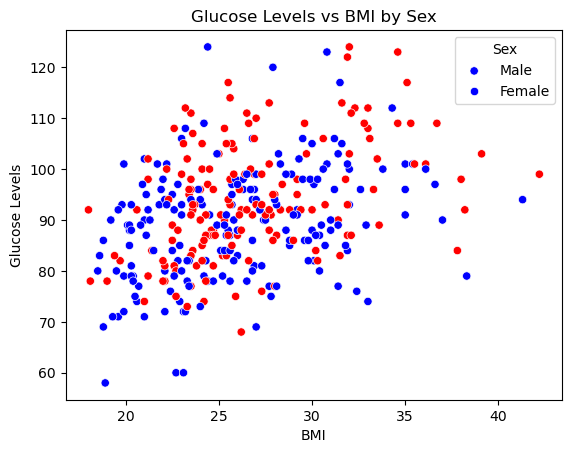

In [5]:
sns.scatterplot(data=train_df,x="bmi", y="s6", hue="sex", palette={1: "blue", 2: "red"})
plt.title("Glucose Levels vs BMI by Sex")
plt.xlabel("BMI")
plt.ylabel("Glucose Levels")
plt.legend(title="Sex", labels=["Male", "Female"])
plt.show()

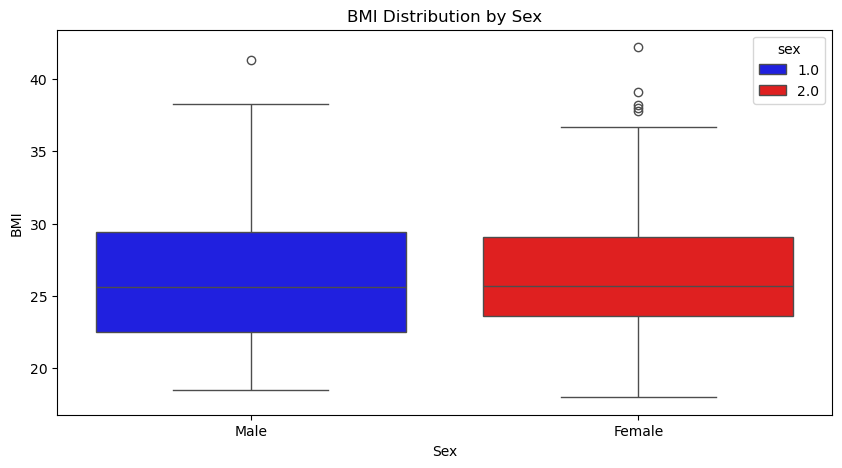

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train_df, x="sex", y="bmi", hue="sex", palette={1: "blue", 2: "red"})
plt.title("BMI Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("BMI")
plt.xticks([0,1], ["Male", "Female"])
plt.show()

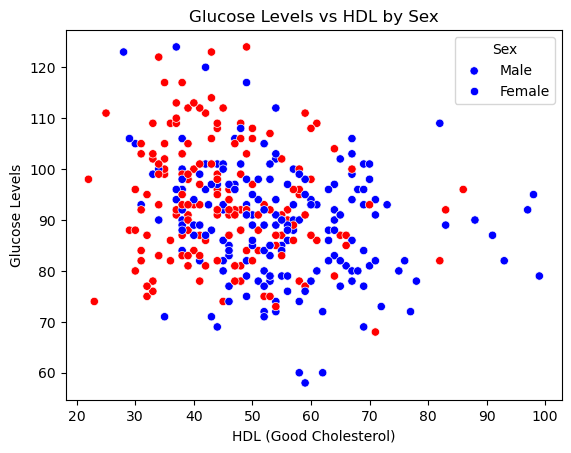

In [7]:
sns.scatterplot(data=train_df, x="s3", y="s6", hue="sex", palette={1: "blue", 2: "red"})

plt.title("Glucose Levels vs HDL by Sex")
plt.xlabel("HDL (Good Cholesterol)")
plt.ylabel("Glucose Levels")

plt.legend(title="Sex", labels=["Male", "Female"])
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [8]:
# Feature engineering - since we got here continuous numerical values and there are some abnormalies, we would use FEATURE SELECTION to choose the features that serve us the best here.

y_train = train_df['target'] # Defining y_train

corr_matrix = train_df.corr()
target_corr = corr_matrix['target'].abs()

# Creating set of feature sets: one is choosing features by target correlation 1, second is using KBest with f_regression function
selected_features = target_corr[target_corr > 0.1].index.tolist()
selected_features.remove('target')
print("Selected Features:", selected_features)

selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(train_df[selected_features], y_train)

mask = selector.get_support()
selected_kbest = [f for f, m in zip(selected_features, mask) if m]
print("Selected by SelectKBest:", selected_kbest)

feature_sets = {"Corr>0.1": selected_features, "SelectKBest": selected_kbest}

Selected Features: ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Selected by SelectKBest: ['bmi', 'bp', 's3', 's4', 's5']


In [9]:
# Creating set of scalers
scalers = {"StandardScaler": StandardScaler(), "MinMaxScaler": MinMaxScaler()}

In [10]:
# Creating set of models: linear, ridge and lasso regression
models = {"Linear": {"model": LinearRegression(), "params":[None]}, "Ridge": {"model": Ridge(), "params":[0.1, 1.0, 10.0]}, "Lasso": {"model": Lasso(max_iter=10000), "params":[0.01, 0.1, 1.0]}}

In [11]:
#Creating a table of the results we get for each feature selection, each scaling method and each regression model
results = []
for feat_name, feat_cols in feature_sets.items():
    X = train_df[feat_cols]
    for scaler_name, scaler in scalers.items():
        X_scaled = scaler.fit_transform(X)
        for model_name, m in models.items():
            for param in m["params"]:
                if model_name == "Linear":
                    model = m["model"]
                else:
                    model = m["model"].set_params(alpha=param)
                scores = cross_val_score(model, X_scaled, y_train, cv=5, scoring="r2")
                results.append({"Features": feat_name, "Scaler": scaler_name, "Model": model_name, "Alpha": param, "Avg. R squared": np.mean(scores)
                  })
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Avg. R squared", ascending=False)
print(results_df)


       Features          Scaler   Model  Alpha  Avg. R squared
23  SelectKBest    MinMaxScaler   Ridge   1.00        0.483034
17  SelectKBest  StandardScaler   Ridge  10.00        0.482861
22  SelectKBest    MinMaxScaler   Ridge   0.10        0.481944
16  SelectKBest  StandardScaler   Ridge   1.00        0.481562
19  SelectKBest  StandardScaler   Lasso   0.10        0.481414
25  SelectKBest    MinMaxScaler   Lasso   0.01        0.481386
15  SelectKBest  StandardScaler   Ridge   0.10        0.481365
18  SelectKBest  StandardScaler   Lasso   0.01        0.481351
21  SelectKBest    MinMaxScaler  Linear    NaN        0.481342
14  SelectKBest  StandardScaler  Linear    NaN        0.481342
20  SelectKBest  StandardScaler   Lasso   1.00        0.481236
26  SelectKBest    MinMaxScaler   Lasso   0.10        0.481114
6      Corr>0.1  StandardScaler   Lasso   1.00        0.478746
0      Corr>0.1  StandardScaler  Linear    NaN        0.478481
7      Corr>0.1    MinMaxScaler  Linear    NaN        0

In [12]:
best_results = results_df.iloc[0]
print("Best Permutation:", best_results)

Best Permutation: Features           SelectKBest
Scaler            MinMaxScaler
Model                    Ridge
Alpha                      1.0
Avg. R squared        0.483034
Name: 23, dtype: object


## Explanation About each Model
**Linear Regression**
Predicts a continuous target based on the input features. Simple, but very sensitive to overfitting if the features are correlated of dataset is small.

**Ridge Regression**
A statistical regularization technique. It corrects for overfitting on training data.

**Lasso Regression**
A regularization technique that applies a penalty to prevent overfitting and enhance the accuracy of statistical models.

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [18]:
# --- Data Preparation (from Parts 1-3) ---
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the training and testing datasets
train_df = pd.read_csv('diabetes_train.csv')
test_df = pd.read_csv('diabetes_test.csv')

# Define X_train, y_train, X_test, and y_test by splitting the dataframes
# This is the step that was missing from the memory
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']
X_test = test_df.drop('target', axis=1)
y_test = test_df['target']

print("Data successfully loaded and prepared.")


# --- Part 4: Train the Model ---
# Create an instance of the model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

Data successfully loaded and prepared.


LinearRegression()

## Part 5 - Apply on test and show model performance estimation

In [17]:
y_pred = model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the final results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 2817.08
Root Mean Squared Error (RMSE): 53.08
R-squared (R²): 0.47
